## Random Forest Classification - Practice

In [4]:
import numpy as np #linear algebra
import pandas as pd #working dataframes and processing the CSV files
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #statistical data visualisation
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('car_evaluation.csv', header=None)
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
data.shape

(1728, 7)

There are 1728 rows and 7 columns

In [7]:
# renaming the columns names
cols = ['buying', 'maintainance', 'doors', 'person_space', 'boot_space', 'safety', 'class']

In [8]:
data.columns = cols

In [9]:
data.head()

,buying,maintainance,doors,person_space,boot_space,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1728 non-null   object
 1   maintainance  1728 non-null   object
 2   doors         1728 non-null   object
 3   person_space  1728 non-null   object
 4   boot_space    1728 non-null   object
 5   safety        1728 non-null   object
 6   class         1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
for i in cols:
    print(data[i].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maintainance, dtype: int64
4        432
5more    432
2        432
3        432
Name: doors, dtype: int64
4       576
more    576
2       576
Name: person_space, dtype: int64
med      576
small    576
big      576
Name: boot_space, dtype: int64
high    576
med     576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


Here we can see that the columns `doors` and `person_space` are categorical in nature.

**Class** is our target variable.

In [12]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

The data is ordinal, this means that the data is categorised into natural order or rank based, like high to low order, but there is no clearly defined interval between the categories.

In [13]:
# finding the missing values
data.isnull().sum()

buying          0
maintainance    0
doors           0
person_space    0
boot_space      0
safety          0
class           0
dtype: int64

There is no `NULL` data in the dataset

In [14]:
# declaring feature vectors, target variable
X = data.drop(['class'], axis=1)
y = data['class']

In [15]:
X

,buying,maintainance,doors,person_space,boot_space,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [16]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

### Splitting the data into training and test data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

### Feature Engineering

In [19]:
X_train.dtypes

buying          object
maintainance    object
doors           object
person_space    object
boot_space      object
safety          object
dtype: object

In [20]:
X_train.head()

,buying,maintainance,doors,person_space,boot_space,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


We'll encode these values into numerical value, using `category_encoder`

In [21]:
import category_encoders as ce

In [22]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maintainance', 'doors', 'person_space', 'boot_space', 'safety'])

In [23]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [24]:
X_train.head()

,buying,maintainance,doors,person_space,boot_space,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [25]:
X_test.head()

,buying,maintainance,doors,person_space,boot_space,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


## Random Forest Classifier model with Default Parameters

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier( n_estimators=10,random_state=0)

In [27]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [28]:
# predicting the test results
y_pred = rfc.predict(X_test)

It have 10 decision tree.

In [29]:
# checking the accuracy
from sklearn.metrics import  accuracy_score
print('Model accuracy score woth 10 decision tree: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score woth 10 decision tree: 0.9247


### Random Forest with n_estimators = 100

In [30]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)

In [31]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


We can see that the accuracy with 10 decision tree is : 0.9247 and with 100 decision tree is : 0.9452

Until now, we've used the all the feature given in the model. Now, we'll only select the important feature, and build the model using these feature and see the effect on th accuracy.

In [32]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

We'll be using `feature importance variable` to see the feature importance scores.

In [33]:
feature_score = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [34]:
feature_score

safety          0.295319
person_space    0.233856
buying          0.151734
maintainance    0.146653
boot_space      0.100048
doors           0.072389
dtype: float64

We can see that the `safety` has the highest score among all of the features.

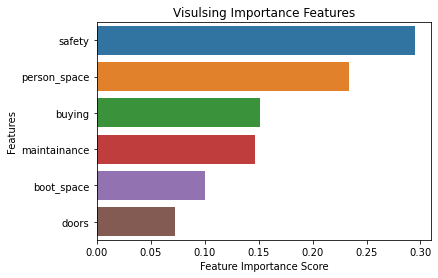

In [35]:
# visualizing the score of the features
sns.barplot(x=feature_score, y=feature_score.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visulsing Importance Features")
plt.show()

## Building the RandomForest model on the selected feature

In [60]:
# declaring the feature variable and the target variable
X = data.drop(['class', 'doors'], axis=1)
y = data['class']

In [61]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [62]:
X.head()

,buying,maintainance,person_space,boot_space,safety
0,vhigh,vhigh,2,small,low
1,vhigh,vhigh,2,small,med
2,vhigh,vhigh,2,small,high
3,vhigh,vhigh,2,med,low
4,vhigh,vhigh,2,med,med


In [63]:
from sklearn.model_selection import  train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Bulding the random forest model and checking the accuracy

In [65]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maintainance', 'person_space', 'boot_space', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [68]:
clf = RandomForestClassifier(n_estimators=50,random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [69]:
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9247


We can see that the feature `doors` does not have significantly affected our model's prediction, so it has no effect on our model. It should have increased the model's accuracy but since we can see that it hasn't.

Now we'll try to remove the second least important feature i.e. `boot_space`.

In [72]:
X = data.drop(['class', 'doors', 'boot_space'], axis=1)
y = data['class']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
encoder = ce.OrdinalEncoder(cols=  ['buying', 'maintainance', 'person_space', 'safety'])

In [75]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [76]:
clf = RandomForestClassifier( n_estimators=10 ,random_state=0)

In [77]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [78]:
print('Model accuracy with doors, boot_space columns removed: {0:.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy with doors, boot_space columns removed: 0.8546


We can see that the **Model's Accuracy** has reduced significantly to: **0.8546**.
Thus we should not drop this feature i.e. `boot_space`.

On the above classification and EDA, we cam see that, our model is doing significantly good and no errors are fond and classification is being made.

### Confusion Matrix
~ It is a tool used for summerizing the performance of a classification algo.A confusion matrix will give us a clear picture of classification model performance and the types of the errors produced by the model. it gives us a correct and incorrect prediction broken down by each category. The summary is represented in a tabular form.

4 typ of outcomes are possible while evaluating the model performance:
1. **True Positives (TP)** - True positives occur when we predict an observation belongs to a certain class and obseravation actually belongs to that class.
2. **True Negatives (TN)** - True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.
3. **False Positives (FP)** - False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called **Type I error**.
4. **False Negatives (FN)** - False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**